In [2]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# Dataset

In [3]:
# Dùng pandas để đọc dữ liệu
dataset_path = 'yogaTrain1.csv'
dataset_path2 = 'yogaTest1.csv'
data_train = pd.read_csv(dataset_path)
data_test = pd.read_csv(dataset_path2)

In [4]:
# Hiển thị 5 mẫu của dữ liệu
data_train.head(5)

,img,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,x17,y17,z17,x18,y18,z18,x19,y19,z19,id
0,12.webp,0.139340,0.171807,-0.152829,0.246744,0.359648,-0.403705,0.267609,0.340197,0.217117,...,0.783804,0.821782,0.401289,0.894776,0.950682,-0.094653,0.856048,0.925101,0.358465,1
1,25-0.png,0.104850,0.336305,0.029908,0.243539,0.231375,-0.278404,0.240953,0.317024,0.375915,...,0.878247,0.815230,0.255288,0.977660,0.931596,-0.095403,0.952507,0.909904,0.186466,1
2,26.jpg,0.255354,0.391517,-0.062290,0.309335,0.513727,-0.253215,0.345149,0.493377,0.197415,...,0.773974,0.726671,0.396829,0.835391,0.800304,0.096260,0.799726,0.796362,0.415129,1
3,27-0.png,0.085922,0.254351,-0.022495,0.220335,0.246836,-0.282698,0.262186,0.230336,0.288124,...,0.935007,0.700075,0.420106,0.983944,0.907284,0.115463,0.966942,0.894847,0.446011,1
4,27.jpg,0.289735,0.132382,-0.362925,0.349598,0.338587,-0.539181,0.355366,0.290335,-0.023722,...,0.742977,0.667350,0.532786,0.837815,0.798470,0.021779,0.802367,0.754852,0.531425,1


# Phân tích dữ liệu

id1:  81
id2:  81
id3:  78
id4:  77
id5:  76
id6:  75
id7:  74
id8:  74
id9:  73


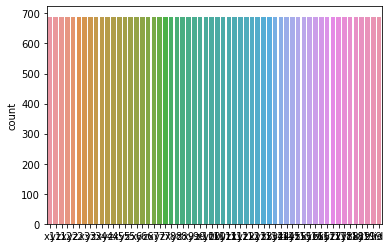

In [9]:
# Quan sát số lượng nhãn 

ax = sns.countplot(data=data_train,label="id")
id1,id2,id3,id4,id5,id6,id7,id8,id9 = data_train.id.value_counts()
print('id1: ',id1)
print('id2: ',id1)
print('id3: ',id3)
print('id4: ',id4)
print('id5: ',id5)
print('id6: ',id6)
print('id7: ',id7)
print('id8: ',id8)
print('id9: ',id9)

<AxesSubplot:>

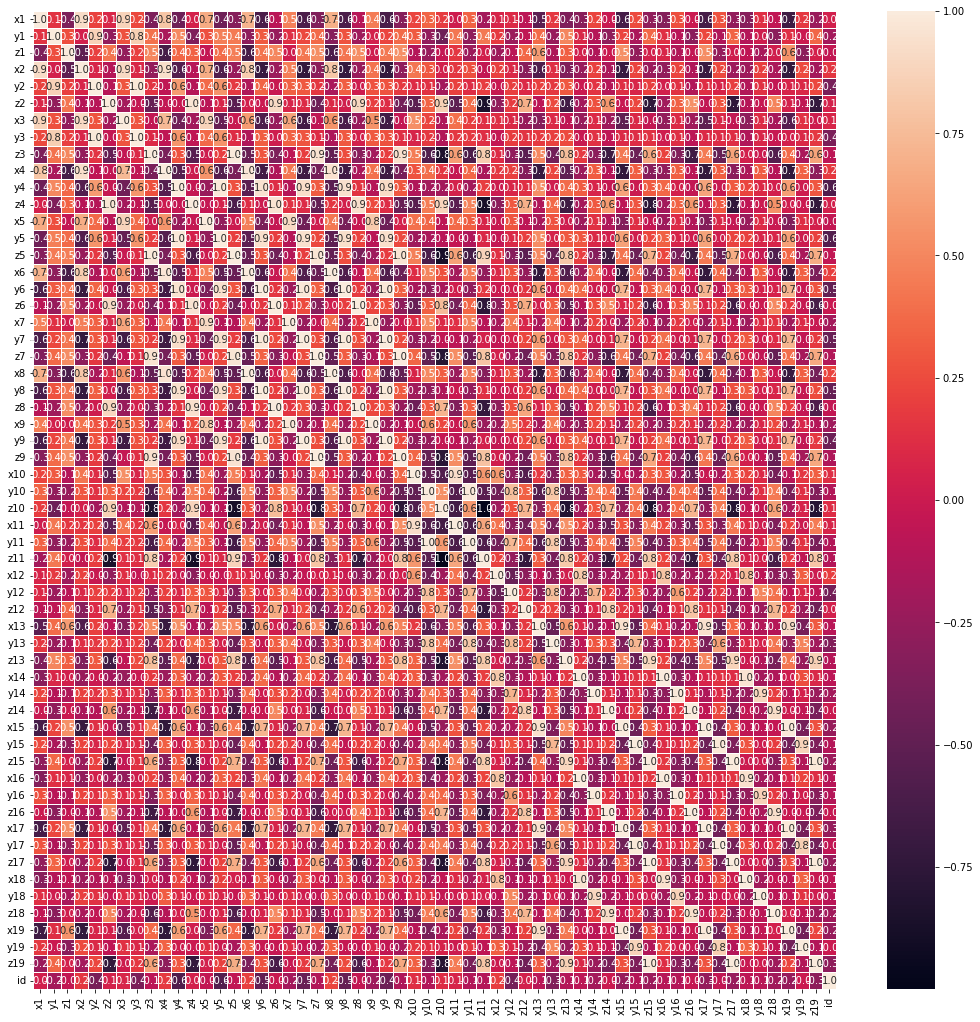

In [10]:
# ma trận tương quan
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_train.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

In [ ]:
#hàm xử lý ngoại lệ
def OutlierProcessing(feature):
  ft_up_limit = feature.mean() + 3 * feature.std()
  ft_low_limit = feature.mean() - 3 * feature.std()
  return ft_up_limit, ft_low_limit

In [ ]:
for col in X.columns:
  name = col + "_pro"
  up, low = OutlierProcessing(X[col])
  X[name] = np.where(X[col] > up, up, X[col])
  X[name] = np.where(X[name] < low, low, X[name])

In [ ]:
#drop các feature gốc
drop_list_X = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','texture_mean','area_mean','smoothness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean','perimeter_se','radius_se','compactness_se','concave points_se','texture_se','area_se','smoothness_se','concavity_se','symmetry_se','fractal_dimension_se','perimeter_worst','radius_worst','compactness_worst','concave points_worst','texture_worst','area_worst','smoothness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst']
X_outliner = X.drop(drop_list_X, axis=1)
#chuẩn hóa min_max
X_outliner_minmax= (X_outliner - X_outliner.min()) / (X_outliner.max() - X_outliner.min())

In [4]:
dataset_path = 'yogaTrain1.csv'
data_train = pd.read_csv(dataset_path)
data_label_train = data_train["id"]
droplist = ['img','id']
data_features_train = data_train.drop(droplist,axis=1)
dataset_path2 = 'yogaTest1.csv'
data_test = pd.read_csv(dataset_path2)
data_label_test = data_test["id"]
data_features_test = data_test.drop(droplist,axis=1)

In [5]:
def train_model():
    data_features_minmax_train = (data_features_train - data_features_train.min()) / (
                data_features_train.max() - data_features_train.min())
    data_features_minmax_test = (data_features_test - data_features_train.min()) / (
                data_features_train.max() - data_features_train.min())
    rfc = RandomForestClassifier()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
     # define search space
    space = dict()
    # so luong cay toi da
    space['bootstrap'] = [True, False]
    # space['min_samples_split'] = [2, 5, 10]
    # space['Best max_features'] = ['auto', 'sqrt']
    # space['min_samples_leaf'] = [1, 2, 4],
    search = GridSearchCV(rfc, space, n_jobs=4, cv=cv)
    result = search.fit(data_features_minmax_train, data_label_train)
    print(result.best_score_)
    print('Best n_estimator:', result.best_estimator_.get_params()['n_estimators'])
    print('Best max_features:', result.best_estimator_.get_params()['max_features'])
    print('Best max_depth:', result.best_estimator_.get_params()['max_depth'])
    print('Best min_samples_split:', result.best_estimator_.get_params()['min_samples_split'])
    print('Best min_samples_leaf:', result.best_estimator_.get_params()['min_samples_leaf'])
    print('Best bootstrap:', result.best_estimator_.get_params()['bootstrap'])
    print('Accuracy',result.score(data_features_minmax_test, data_label_test))
    y_pred = result.predict(data_features_minmax_test)
    cm = confusion_matrix(data_label_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")

0.9918712702472294
Best n_estimator: 100
Best max_features: sqrt
Best max_depth: None
Best min_samples_split: 2
Best min_samples_leaf: 1
Best bootstrap: False
Accuracy 0.9794721407624634


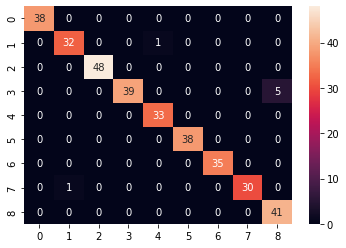

In [6]:
train_model()

# Nhận xét: 


> Khi xử lý ngoại lệ thì độ chính xác không thay đổi, có thể do hầu hết các ngoại lệ đều mang tính phân loại

